# 約維安計畫：羅吉斯迴歸（上）

> 第四十三週

![giphy.com](https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExZTJienFmbzBjMTloOWx1cTA0cDcyNHEyM3J0azBoa2RmNGRhaGNiYiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/Y2XUgTRHYg9pQ04I7r/giphy.gif)

來源：<https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExZTJienFmbzBjMTloOWx1cTA0cDcyNHEyM3J0azBoa2RmNGRhaGNiYiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/Y2XUgTRHYg9pQ04I7r/giphy.gif>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 什麼是羅吉斯迴歸

在約維安計畫：梯度遞減一文中我們提到了梯度遞減（gradient descent），這是一種以多次迭代的方式優化權重向量，進而以優化過後的權重向量生成 h 函數的學習演算法（learning algorithm），也是我們在機器學習系列文章中，繼第一個學習演算法正規方程式（normal equations）之後所學會的第二個學習演算法。

第一個學習演算法：正規方程式。

\begin{align}
\hat{y} = h(X) = Xw \; \text{,where} \; X \in \mathbb{R^{m \times n}} \\
w = \left( X^\top X \right)^{-1} X^\top y \; \text{,where} \; w \in \mathbb{R}^n ;\ y \in \mathbb{R}^m
\end{align}

第二個學習演算法：梯度遞減。

\begin{gather}
\text{For each epoch:} \\
w := w - \eta \nabla_w J(w) \; \text{, where } \eta \in \mathbb{R}^+ 
\end{gather}

在先前介紹這兩個學習演算法的文章中，我們的成本函數（cost function）都是以均方誤差（mean square error）為例，計算均方誤差關於權重向量的偏微分，獲得梯度的值，來回推梯度為零的權重向量解，或者以梯度乘上學習速率（learning rate）來得知在該次迭代中權重向量應該被更新的方向與量值。

那麼當成本函數不是均方誤差的時候呢？均方誤差是迴歸的學習演算方法最為泛用的成本函數，而交叉熵（cross entropy）則是分類的最為泛用的成本函數，羅吉斯迴歸（logistic regression）就是一種基於交叉熵作為成本函數、Sigmoid 函數作為活化函數（activation function）的分類學習演算法，雖然它的命名中有迴歸（regression），但其實是類別預測的模型，而非數值預測的模型。

## 交叉熵

交叉熵是一種基於對數函數與分類機率所設計而成的成本函數，它利用了在對數函數前面加上一個負號，達成分類學習演算法的核心目的：錯誤分類會造成很大的成本，正確分類會造成很低的成本。

\begin{equation}
  J(\hat{p_i})=\begin{cases}
   -log(1 - \hat{p_i}), & \text{if $y_i = 0$}.\\
   -log(\hat{p_i}), & \text{if $y_i = 1$}.
  \end{cases}
\end{equation}

在對應目標向量的第 i 個元素為 0 時，模型若輸出微小的機率 $\epsilon$ 表示正確預測，此時負對數函數的值為 $-log(1 - \epsilon)$ 接近於零；模型若輸出極高的機率 $1 - \epsilon$ 表示錯誤預測，此時負對數函數的值為 $-log(\epsilon)$ 接近於無限大。

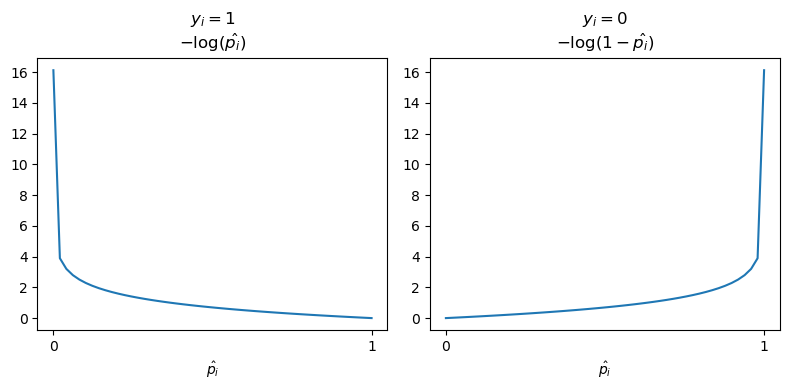

In [2]:
def plot_cross_entropy():
    epsilon = 1e-7
    h = np.linspace(epsilon, 1-epsilon) # 利用微小值 epsilon 避免 log(0) 的錯誤
    y1 = -np.log(h)
    y2 = -np.log(1 - h)
    fig, ax = plt.subplots(1, 2, figsize = (8, 4))
    ax[0].plot(h, y1)
    ax[0].set_title("$y_i=1$\n$-\log(\hat{p_i})$")
    ax[0].set_xticks([0, 1])
    ax[0].set_xticklabels([0, 1])
    ax[0].set_xlabel("$\hat{p_i}$")
    ax[1].plot(h, y2)
    ax[1].set_title("$y_i=0$\n$-\log(1-\hat{p_i})$")
    ax[1].set_xticks([0, 1])
    ax[1].set_xticklabels([0, 1])
    ax[1].set_xlabel("$\hat{p_i}$")
    plt.tight_layout()
    plt.show()

plot_cross_entropy()

藉由這兩個負對數函數的特性，我們可以將它們合而為一，成為交叉熵函數，當我們將 $y_i$ 分別以 0 或 1 帶入時，就可以各自得到原本的兩個負對數函數。

\begin{equation}
  J(\hat{p})= \frac{1}{m} \left( \sum_i^m -(1-y_i)log(1 - \hat{p_i})- y_i log(\hat{p_i}) \right)
\end{equation}

## Sigmoid 函數

由於特徵矩陣和權重向量中元素相乘相加的結果是連續值的線性函數，若想將其轉換為機率的輸出，就需要仰賴 Sigmoid 函數，該函數是一個將連續值輸入映射至 $[0, 1]$ 範圍的活化函數，由自然對數的底數 e（Euler’s constant）所組成，也被稱作羅吉斯函數（logistic function）。

\begin{align}
\sigma(x) = \frac{1}{1 + e^{-x}} \\
\hat{p_i} = \sigma(x_iw_i)
\end{align}

Sigmoid 函數在輸入連續值很小（負無限大）的情況下，會得到一個接近於零的輸出；在輸入連續值恰巧等於 1 的情況下，會得到剛好等於 0.5 的輸出；在輸入連續值很大（無限大）的情況下，會得到一個接近於 1 的輸出，因此是一種將連續值輸入轉換為機率值的活化函數。

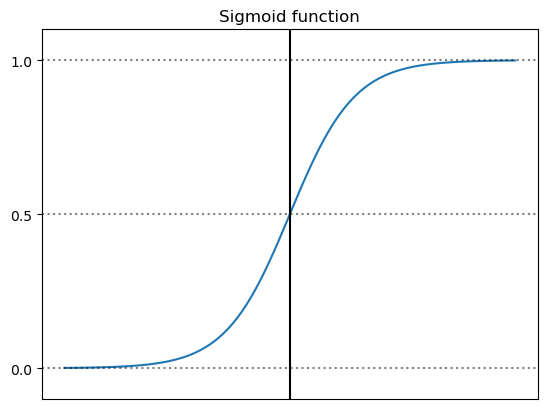

In [3]:
def plot_sigmoid():
    x = np.linspace(-7, 7, 100)
    y = 1 / (1 + np.exp(-x))
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(x, y)
    ax.axvline(0, color = 'black')
    ax.axhline(y = 0, ls = ':', color = 'k', alpha = 0.5)
    ax.axhline(y = 0.5, ls = ':', color = 'k', alpha = 0.5)
    ax.axhline(y = 1, ls = ':', color = 'k', alpha = 0.5)
    ax.set_yticks([0.0, 0.5, 1.0])
    ax.set_xticks([])
    ax.set_ylim(-0.1, 1.1)
    ax.set_title("Sigmoid function")
    plt.show()
    
plot_sigmoid()

## 羅吉斯迴歸

在使用交叉熵作為成本函數、Sigmoid 函數作為活化函數的情況下，我們能夠以梯度遞減的學習演算方法求得權重向量，這便是羅吉斯迴歸的二元分類模型，其命名由來羅吉斯（logistic）就是因為 Sigmoid 函數也被稱為 Logistic 函數的原因。

\begin{gather}
z = Xw \\
\hat{p} = \sigma(z) \text{, where } \sigma(x) = \frac{1}{1 + e^{-x}} \\
J(\hat{p}) = \frac{1}{m} \left( -ylog(\hat{p}) - (1-y)log(1-\hat{p}) \right) \\
J(w) = \frac{1}{m} \left( -ylog(\sigma(Xw)) - (1-y)log(1-\sigma(Xw)) \right)
\end{gather}

再透過梯度遞減的學習演算方法求解權重向量。

\begin{gather}
\text{For each epoch:} \\
w := w - \eta \nabla_w J(w) \; \text{, where } \eta \in \mathbb{R}^+ 
\end{gather}

下一篇文章，我們就要接著推導以交叉熵作為成本函數 J 關於權重向量的梯度，第四十三週約維安計畫：羅吉斯迴歸（上）來到尾聲，希望您也和我一樣期待下一篇文章。對於這篇文章有什麼想法呢？喜歡😻、分享🙌、訂閱📨或者留言🙋‍♂️